In [1]:
!pip install fbprophet

# 1. Import Dependencies

In [1]:
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


# 2. Load Data

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,Date,Store/Product,Value
0,1/1/18,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,2/1/18,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,3/1/18,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,4/1/18,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,5/1/18,LOS_ANGELES-TESLA_MODEL_X,2660.000


# 3. Apply Data Preprocessing

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
frame = df[df['Store/Product']=='LOS_ANGELES-TESLA_MODEL_X'].copy()
frame.drop('Store/Product',axis=1, inplace=True)
frame.columns = ['ds','y']

In [7]:
frame.head()

,ds,y
0,2018-01-01,2926.000
1,2018-02-01,2687.531
2,2018-03-01,2793.000
3,2018-04-01,2394.000
4,2018-05-01,2660.000


# 4. Create Time Series Model

In [8]:
m = Prophet(interval_width=0.95)
model = m.fit(frame)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 5. Evaluate Model

In [9]:
future = m.make_future_dataframe(periods=700,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1775,2022-11-12,5307.466520,2051.420110,7034.661034,5307.446940,5307.485387,-758.574593,-758.574593,-758.574593,24.132969,24.132969,24.132969,-782.707562,-782.707562,-782.707562,0.0,0.0,0.0,4548.891927
1776,2022-11-13,5308.493276,2109.764545,6666.794558,5308.473667,5308.512183,-854.644811,-854.644811,-854.644811,-8.280438,-8.280438,-8.280438,-846.364373,-846.364373,-846.364373,0.0,0.0,0.0,4453.848465
1777,2022-11-14,5309.520031,1890.691398,6620.706295,5309.500394,5309.538980,-925.278512,-925.278512,-925.278512,-16.511577,-16.511577,-16.511577,-908.766935,-908.766935,-908.766935,0.0,0.0,0.0,4384.241519
1778,2022-11-15,5310.546787,1988.895581,6859.342393,5310.527120,5310.565776,-993.129300,-993.129300,-993.129300,-24.401000,-24.401000,-24.401000,-968.728300,-968.728300,-968.728300,0.0,0.0,0.0,4317.417487
1779,2022-11-16,5311.573543,1873.502183,6593.473114,5311.553847,5311.592572,-1070.280482,-1070.280482,-1070.280482,-45.173759,-45.173759,-45.173759,-1025.106723,-1025.106723,-1025.106723,0.0,0.0,0.0,4241.293060


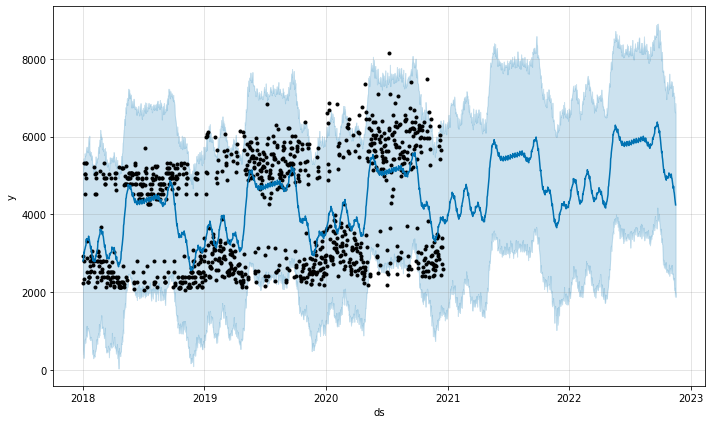

In [10]:
plot1 = m.plot(forecast)

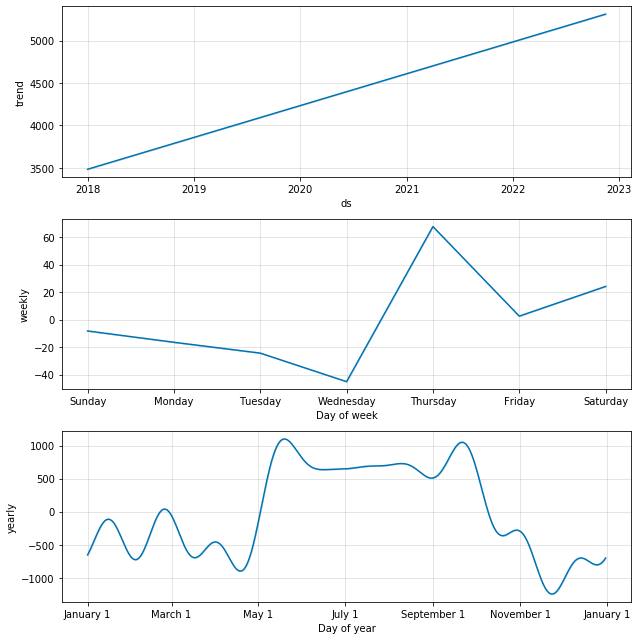

In [11]:
plt2 = m.plot_components(forecast)

# BONUS ROUND - Scaling Up

In [12]:
lines = df['Store/Product'].unique()

In [13]:
lines

array(['LOS_ANGELES-TESLA_MODEL_X', 'LOS_ANGELES-TESLA_MODEL_S',
       'SAN_FRANCISCO-TESLA_MODEL_S'], dtype=object)

In [14]:
fit_models = {}
for stock_line in lines: 
    m = Prophet(interval_width=0.95)
    model = m.fit(frame)
    fit_models[stock_line] = m 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
fit_models

{'LOS_ANGELES-TESLA_MODEL_X': <fbprophet.forecaster.Prophet at 0x7fde9aa331d0>,
 'LOS_ANGELES-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x7fdeb3c74c10>,
 'SAN_FRANCISCO-TESLA_MODEL_S': <fbprophet.forecaster.Prophet at 0x7fde99c78250>}

In [22]:
forward = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].make_future_dataframe(200)
forecast = fit_models['SAN_FRANCISCO-TESLA_MODEL_S'].predict(forward)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3483.987620,603.448893,5299.973579,3483.987620,3483.987620,-681.234064,-681.234064,-681.234064,-16.511577,-16.511577,-16.511577,-664.722487,-664.722487,-664.722487,0.0,0.0,0.0,2802.753556
1,2018-01-02,3485.014274,566.006480,5064.998346,3485.014274,3485.014274,-648.083845,-648.083845,-648.083845,-24.401000,-24.401000,-24.401000,-623.682844,-623.682844,-623.682844,0.0,0.0,0.0,2836.930430
2,2018-01-03,3486.040929,252.524857,5190.850406,3486.040929,3486.040929,-623.990336,-623.990336,-623.990336,-45.173759,-45.173759,-45.173759,-578.816577,-578.816577,-578.816577,0.0,0.0,0.0,2862.050592
3,2018-01-04,3487.067583,588.959256,5519.889503,3487.067583,3487.067583,-463.272765,-463.272765,-463.272765,67.724283,67.724283,67.724283,-530.997048,-530.997048,-530.997048,0.0,0.0,0.0,3023.794818
4,2018-01-05,3488.094237,706.995427,5299.658302,3488.094237,3488.094237,-478.704116,-478.704116,-478.704116,2.509522,2.509522,2.509522,-481.213638,-481.213638,-481.213638,0.0,0.0,0.0,3009.390121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2021-06-30,4794.088724,3103.186005,7924.646254,4794.085924,4794.091360,601.127684,601.127684,601.127684,-45.173759,-45.173759,-45.173759,646.301443,646.301443,646.301443,0.0,0.0,0.0,5395.216408
1276,2021-07-01,4795.115479,3203.905317,7752.288050,4795.112665,4795.118136,715.339613,715.339613,715.339613,67.724283,67.724283,67.724283,647.615330,647.615330,647.615330,0.0,0.0,0.0,5510.455093
1277,2021-07-02,4796.142235,2997.570177,7932.757226,4796.139407,4796.144912,651.714623,651.714623,651.714623,2.509522,2.509522,2.509522,649.205101,649.205101,649.205101,0.0,0.0,0.0,5447.856858
1278,2021-07-03,4797.168990,3093.946439,7844.548640,4797.166147,4797.171688,675.220549,675.220549,675.220549,24.132969,24.132969,24.132969,651.087579,651.087579,651.087579,0.0,0.0,0.0,5472.389539
